# Fall 2024 CBE 162 Lab 9: Tuning and Stability Analysis

## Objective
In this lab, we will explore the tuning and stability of a closed-loop control system using **Direct Synthesis** tuning. Additionally, we will verify system stability using the **Routh Stability Criterion** and evaluate the system's performance through the **Integrated Square Error (ISE)** metric.

## System Description
We will work with a first-order system with the following characteristics:
- Gain ($K_s$)
- Time constant ($\tau_s$)
- Dead time ($\theta$)

Components of the system include:
- **Actuator**: Zeroth-order with gain $K_a = 1$
- **Measurement device**: Zeroth-order with gain $K_m = 1$
- **PID controller**: with transfer function:
$$ G_c(s) = K_p \left(1 + \frac{1}{\tau_I s} + \tau_D s \right) $$

### Parameters
Ensure the following initial values are used:
- $K_s = 11.6$, $\tau_s = 6$, $\theta = 0.2$
- $K_a = 1.0$, $K_m = 1.0$
- PID parameters: $K_p = 1$, $\tau_I = 1$, $\tau_D = 1$

## Problem 1: Building the Closed-Loop Transfer Function
**Step 1**: Construct the transfer function for the closed-loop system.

**Tasks**:
1. Define the transfer function of the first-order system.
2. Create the PID controller transfer function in terms of $K_p$, $\tau_I$, and $\tau_D$.
3. Combine these using `signal.TransferFunction` to obtain the closed-loop transfer function.

Implement the closed-loop transfer function that maps the controller setpoint to the output response.



In [1]:
# Define the transfer function components
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.signal import tf2zpk, TransferFunction, step

Ks = 11.6
taus = 6
theta = 0.20

Ka = 1.0
Km = 1.0

Kp = 1
tauI = 1
tauD = 1

# Your transfer function code here

# 1.)
numerator_plant = [Ks]
denominator_plant = [taus, 1]

first_order_tf = TransferFunction(numerator_plant, denominator_plant)

numerator_deadtime = [1, -theta / 2]
denominator_deadtime = [1, theta / 2]

# 2.)
numerator_pid = [Kp * tauD * tauI, Kp * tauI, Kp]
denominator_pid = [tauI, 0]
numerator_open_loop = np.polymul(numerator_plant, numerator_pid)
denominator_open_loop = np.polymul(denominator_plant, denominator_pid)

numerator_open_loop = np.polymul(numerator_open_loop, numerator_deadtime)
denominator_open_loop = np.polymul(denominator_open_loop, denominator_deadtime)

# 3.)
numerator_closed_loop = numerator_open_loop
denominator_closed_loop = np.polyadd(denominator_open_loop, numerator_open_loop)

closed_loop_tf = TransferFunction(numerator_closed_loop, denominator_closed_loop)



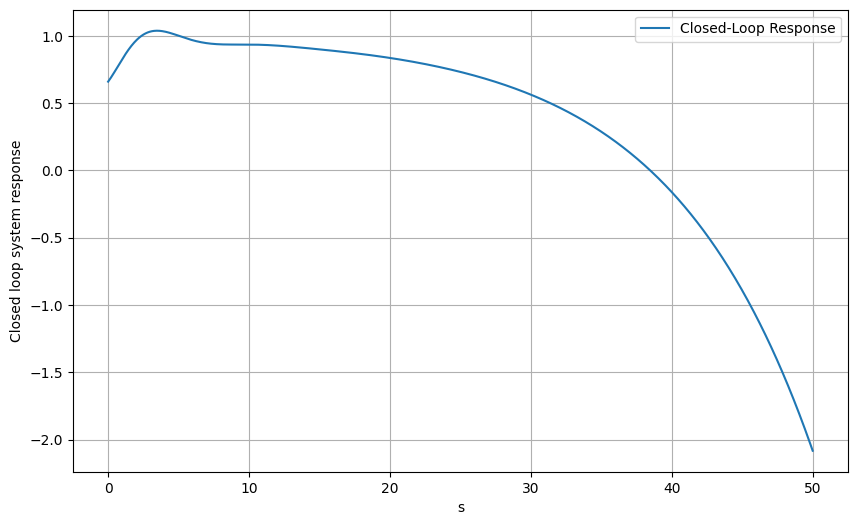

In [2]:
time = np.linspace(0, 50, 1000)
time, response = step(closed_loop_tf, T=time)

plt.figure(figsize=(10, 6))
plt.plot(time, response, label="Closed-Loop Response")
plt.xlabel("s")
plt.ylabel("Closed loop system response")
plt.grid()
plt.legend()
plt.show()

## Problem 2: Applying Direct Synthesis Tuning
**Objective**: Use the **Direct Synthesis tuning** method to set PID parameters.

**Tasks**:
1. Calculate the desired closed-loop transfer function based on a specified target time constant.
2. Adjust $K_p$, $\tau_I$, and $\tau_D$ to match the Direct Synthesis method.
3. Plot the system response from $t=0$ to $t=36$ seconds.

**Questions**:
- How does Direct Synthesis tuning compare to the previous controller in terms of stability?
- Document any instability observed, and note changes that stabilize the response.
Write your answer as a comment at the end of your code.

Direct Synthesis PID Parameters:
Kp: 1.00, tauI: 11.60, tauD: 1.00


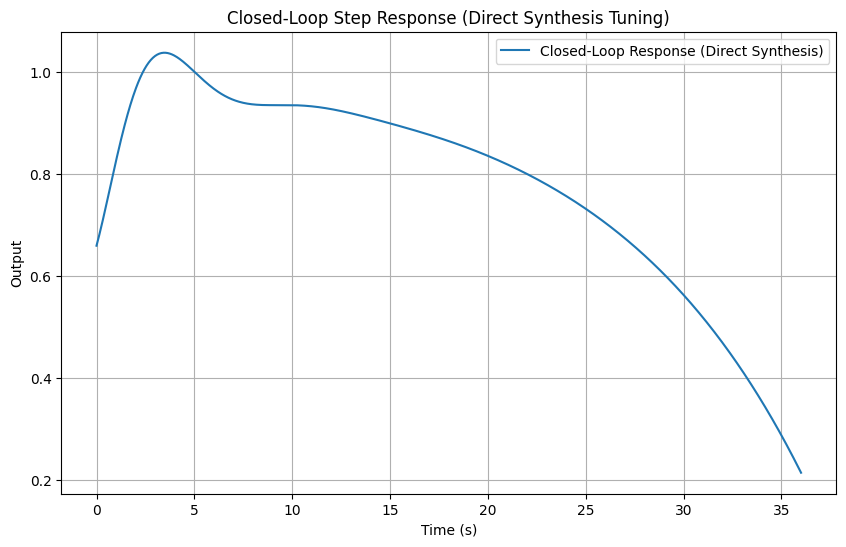

In [3]:
# Direct Synthesis Tuning implementation
desired_time_constant = tau_c = 5
numerator_cl = [1]
denominator_cl = [tau_c, 1]
numerator_controller = np.polymul(numerator_cl, denominator_deadtime)
denominator_controller = np.polymul(denominator_cl, [Ks, 0])  

Kp = numerator_controller[0]
tauI = denominator_controller[1] / numerator_controller[0]
tauD = numerator_deadtime[0] / numerator_controller[0]


print(f"Direct Synthesis PID Parameters:")
print(f"Kp: {Kp:.2f}, tauI: {tauI:.2f}, tauD: {tauD:.2f}")

# numerator_pid = [Kp * tauD, Kp, Kp / tauI]
# denominator_pid = [1, 0]
# numerator_plant = [Ks]
# denominator_plant = [taus, 1]
# numerator_open_loop = np.polymul(np.polymul(numerator_plant, numerator_deadtime), numerator_pid)
# denominator_open_loop = np.polymul(np.polymul(denominator_plant, denominator_deadtime), denominator_pid)

# # Closed-loop transfer function: T(s) = L(s) / (1 + L(s))
# numerator_closed_loop = numerator_open_loop
# denominator_closed_loop = np.polyadd(denominator_open_loop, numerator_open_loop)

# # Simulate step response
closed_loop_tf = TransferFunction(numerator_closed_loop, denominator_closed_loop)
time = np.linspace(0, 36, 1000)
time, response = step(closed_loop_tf, T=time)

# Plot the step response
plt.figure(figsize=(10, 6))
plt.plot(time, response, label="Closed-Loop Response (Direct Synthesis)")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.title("Closed-Loop Step Response (Direct Synthesis Tuning)")
plt.grid()
plt.legend()
plt.show()


# Your Direct Synthesis tuning code here


## Problem 3: Stability Verification using the Routh Stability Criterion
**Objective**: Verify system stability by applying the **Routh Stability Criterion** to the characteristic equation.

**Tasks**:

1. Apply the Routh Stability Criterion to determine stability.Use numpy arrays for this task.




In [4]:
# Routh Stability Criterion


## Problem 4: Performance Evaluation using Integrated Square Error (ISE)
**Objective**: Evaluate the system's response to a step input by calculating the Integrated Square Error (ISE).

**Tasks**:
1. Simulate a step response for the closed-loop system.
2. Calculate ISE as a performance metric for various parameter settings.
$$
ISE = \int_0^T e(t)^2 \, dt
$$

**Instructions**:
- Integrate the squared error over time to obtain the ISE. Compare the ISE of the two controllers discussed, and evaluate which you would choose for the system.


In [5]:
# Step response and ISE calculation

def calculate_ise(response, setpoint):
    error = response - setpoint
    ise = np.sum(error**2)
    return ise

# Run step response and calculate ISE
# Your code here


## Conclusion
Summarize findings related to Direct Synthesis tuning, stability verification via Routh, and performance evaluation through ISE.
- How effective was the Routh criterion in predicting stability?
- How did the ISE metric inform the tuning process and performance evaluation?

